In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("2.1-Decision Tree Classification in Machine Learning DataSet/shop data.csv")
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [3]:
x=df.iloc[:,:4]
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [4]:
x=df.iloc[:,:-1]
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [5]:
y=df.iloc[:,4]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
15    yes
16    yes
17    yes
18    yes
19    yes
20     no
21    yes
Name: buys, dtype: object

### Lavel Encoding Data preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_x=LabelEncoder()

In [8]:
x=x.apply(le_x.fit_transform)
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


### ```Decision Tree Classification```

In [9]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [10]:
#object create
dt=DecisionTreeClassifier()

In [11]:
dt=dt.fit(x,y)
dt

DecisionTreeClassifier()

In [12]:
dt=dt.predict([[1,1,0,1]])
dt

array(['yes'], dtype=object)

### ` Another Decision Tree Classification `

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=1)

In [14]:
xtrain

,age,income,gender,m_status
10,1,2,0,1
4,2,1,0,1
2,0,0,1,1
17,1,0,0,1
6,0,1,0,0
7,1,2,1,0
1,1,0,1,0
14,1,0,1,1
0,1,0,1,1
21,1,1,1,1


In [15]:
xtest

,age,income,gender,m_status
19,0,0,1,1
16,2,2,1,0
3,2,2,1,1
13,2,2,1,0
18,0,2,0,0
15,1,0,0,0


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dect=DecisionTreeClassifier()

In [18]:

dect.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [19]:
y_predict = dect.predict(xtest)

In [20]:
y_predict

array(['yes', 'no', 'no', 'no', 'yes', 'yes'], dtype=object)

### Model accuracy

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
cm = confusion_matrix(ytest,y_predict)

In [23]:
cm

array([[1, 0],
       [2, 3]], dtype=int64)

In [24]:

xinput = np.array([1,0,0,1])

In [25]:
y_predict = dect.predict([xinput])

In [26]:
y_predict

array(['yes'], dtype=object)

Text(69.0, 0.5, 'Truth')

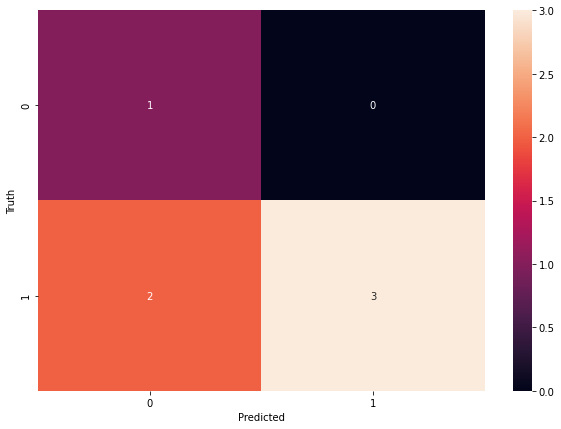

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
dect.score(xtest,ytest)

0.6666666666666666

#### ```Model Score 75%```